In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob as gb
import tensorflow as tf

In [3]:
size=94
train_dir='.\\Eye dataset'

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset="training",shuffle=True)

Found 10115 images belonging to 4 classes.


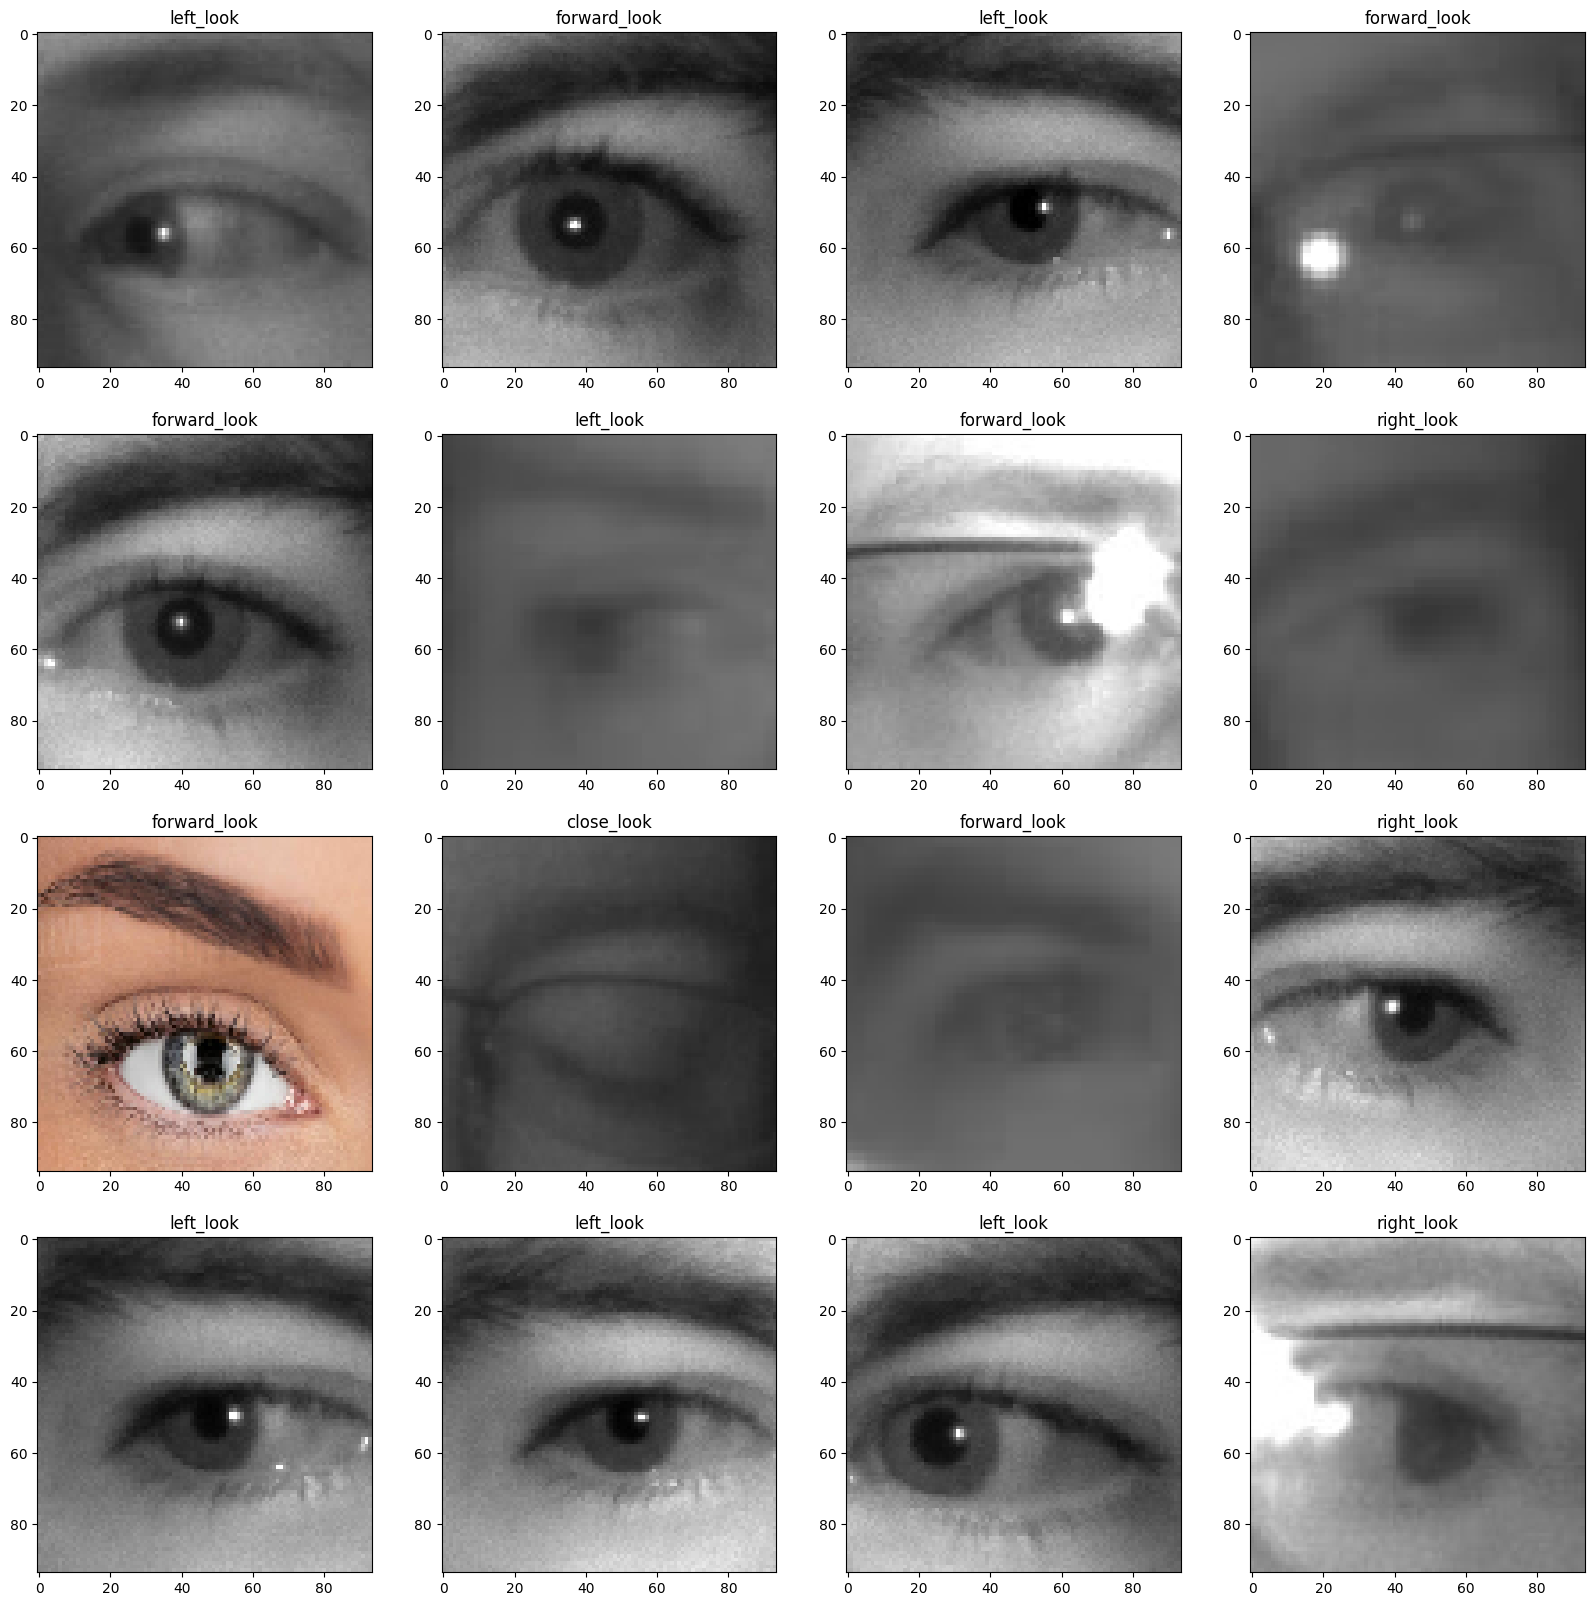

In [4]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [5]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)

Found 1121 images belonging to 4 classes.


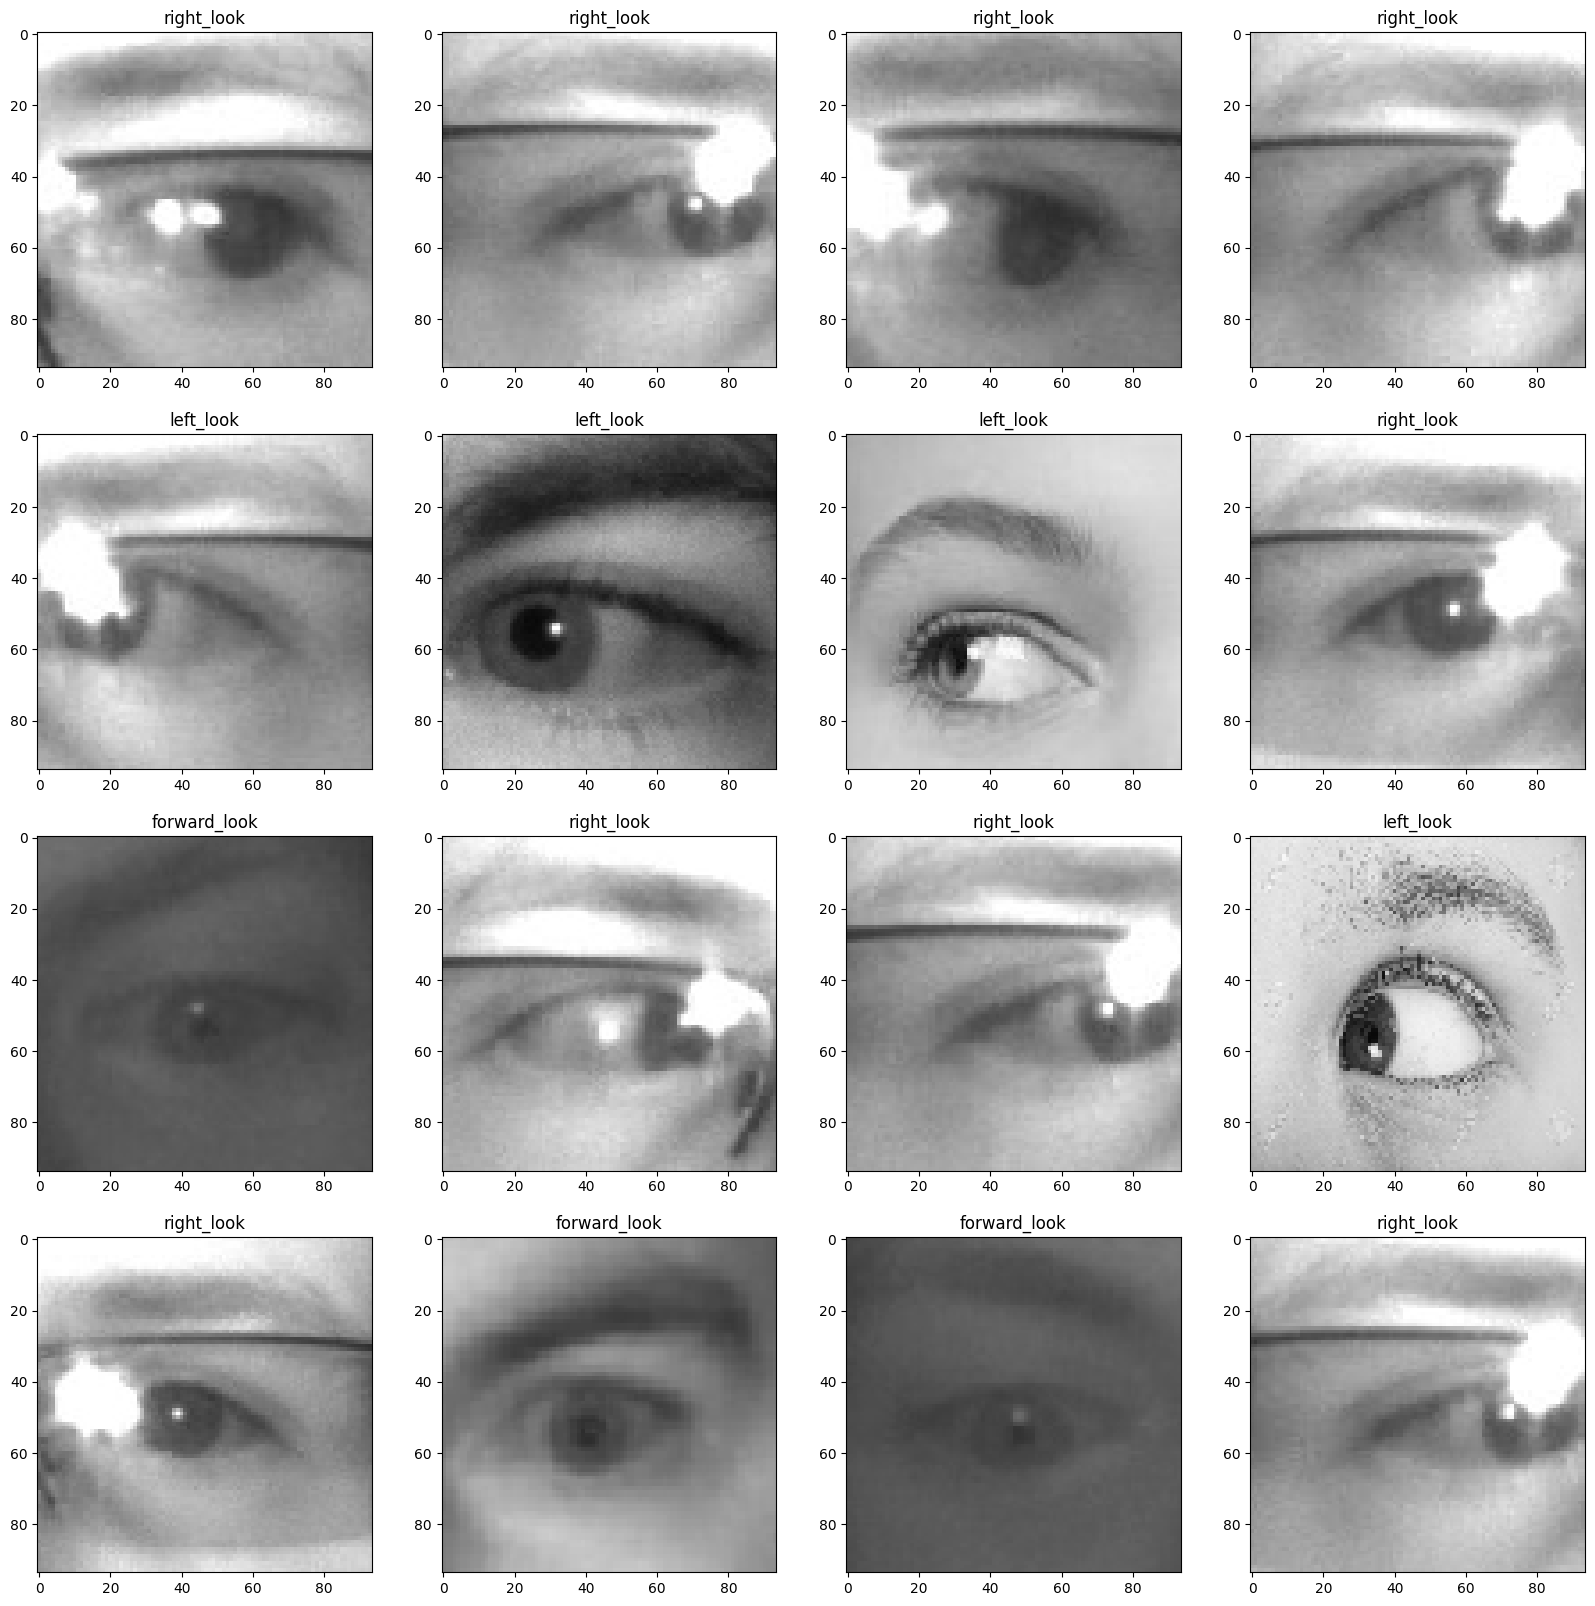

In [6]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [7]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)


Found 1121 images belonging to 4 classes.


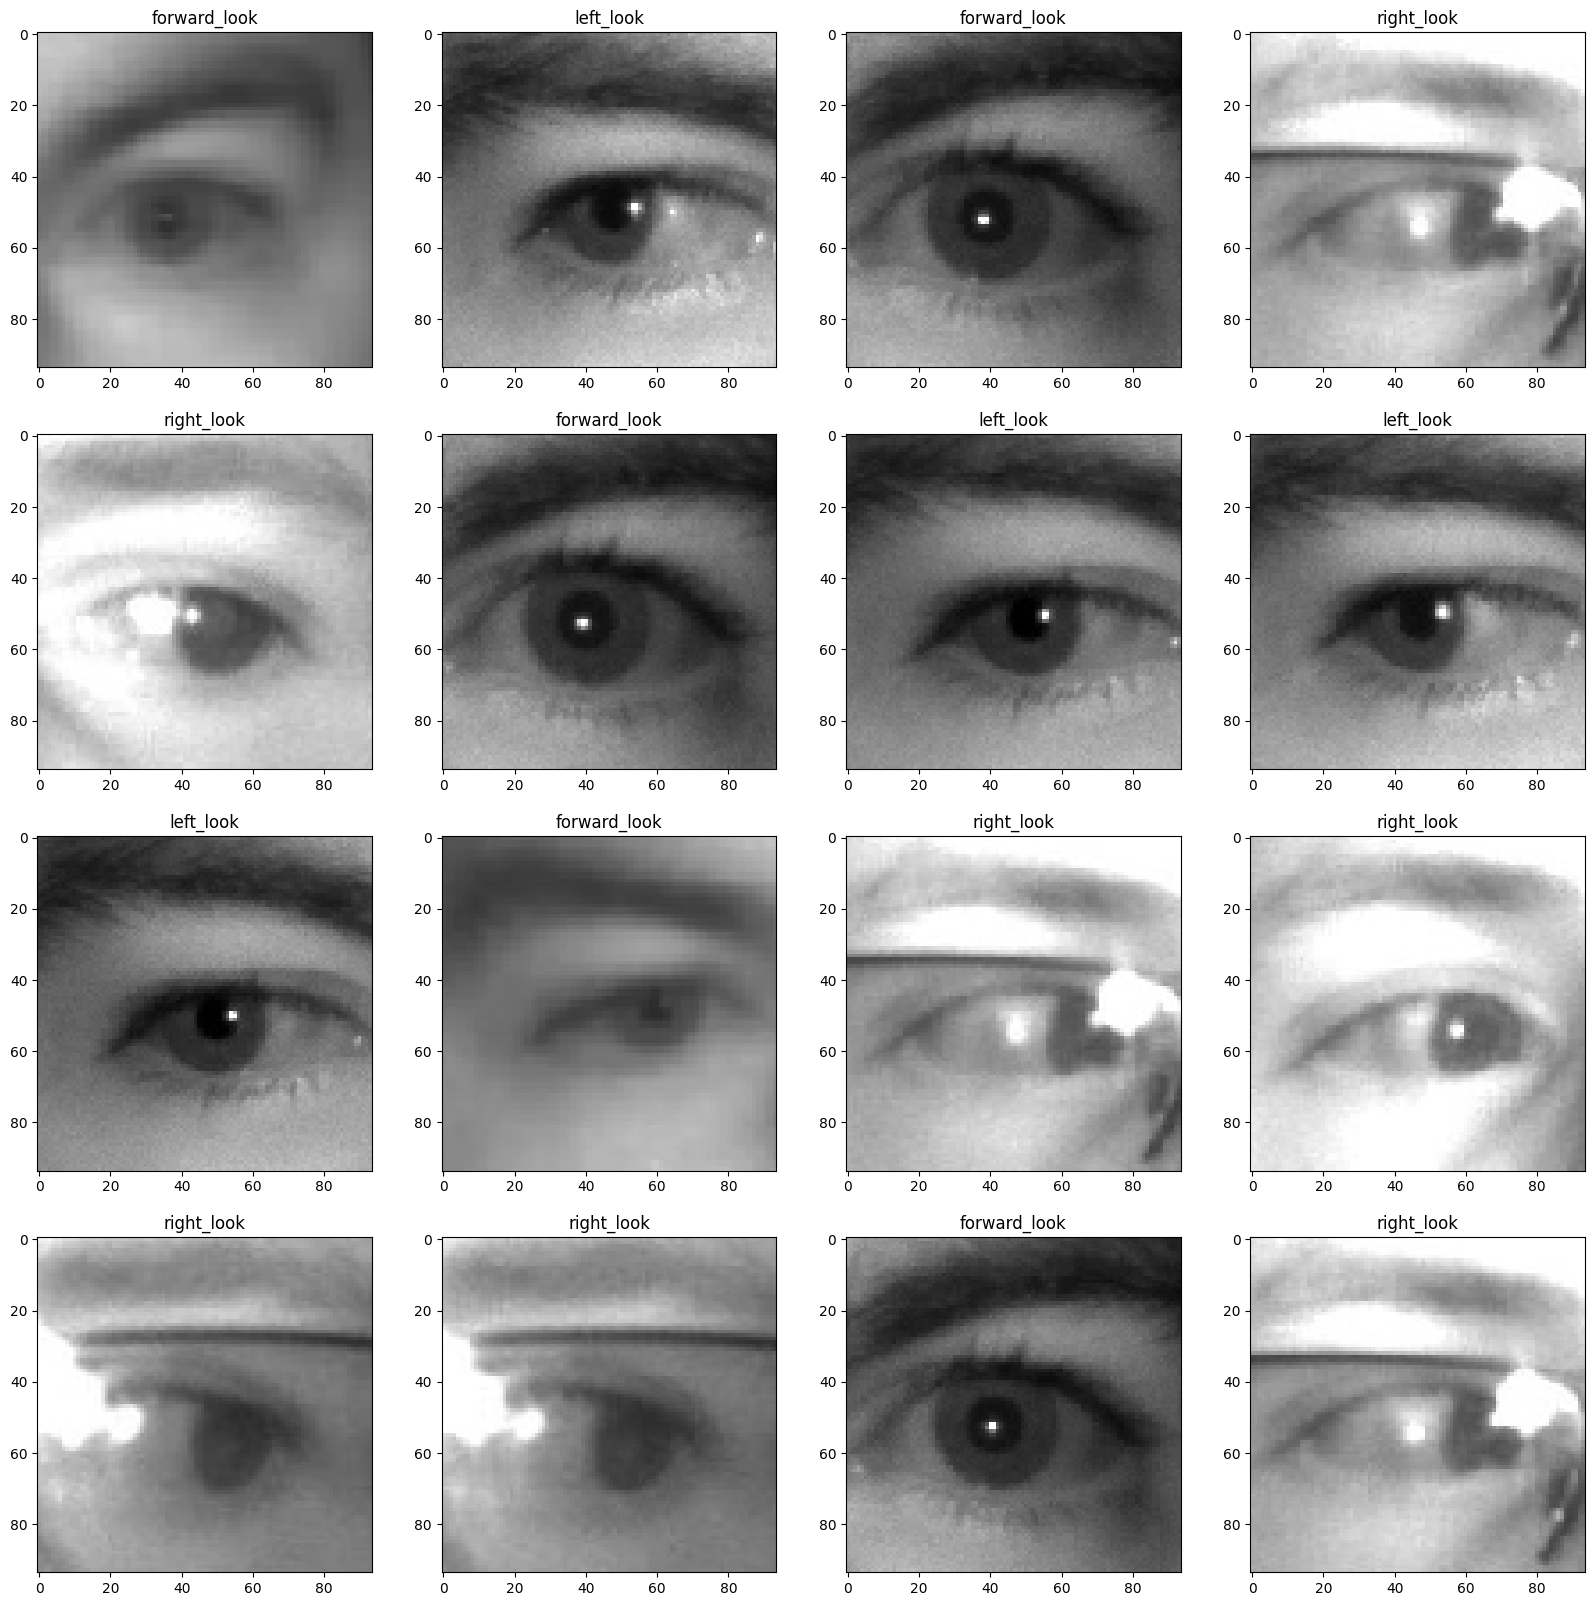

In [8]:
classes=list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [9]:
classes

['close_look', 'forward_look', 'left_look', 'right_look']

In [10]:
from keras.models import Sequential 
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [37]:
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [38]:
EarlyStop=EarlyStopping(patience=20,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [39]:
model=Sequential([
                  Conv2D(32,3,activation='relu',kernel_initializer='he_normal',input_shape=(size,size,3)),
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Conv2D(256,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
    
                  Flatten(),
                  Dense(64,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  Dense(4,activation='softmax',kernel_initializer='glorot_normal')
                  
])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 92, 92, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_12 (Ba  (None, 90, 90, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_13 (Ba  (None, 28, 28, 128)      

In [41]:
model.compile(optimizer=optimizer_adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=50,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/50
39/39 [==============================] - ETA: 0s - loss: 0.9843 - accuracy: 0.5978
Epoch 1: val_loss improved from inf to 1.36488, saving model to model.hdf5
39/39 [==============================] - 4s 52ms/step - loss: 0.9843 - accuracy: 0.5978 - val_loss: 1.3649 - val_accuracy: 0.1094 - lr: 0.0010
Epoch 2/50
39/39 [==============================] - ETA: 0s - loss: 0.5209 - accuracy: 0.8317
Epoch 2: val_loss improved from 1.36488 to 1.27623, saving model to model.hdf5
39/39 [==============================] - 2s 48ms/step - loss: 0.5209 - accuracy: 0.8317 - val_loss: 1.2762 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 3/50
38/39 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8586
Epoch 3: val_loss improved from 1.27623 to 1.03783, saving model to model.hdf5
39/39 [==============================] - 2s 47ms/step - loss: 0.4089 - accuracy: 0.8606 - val_loss: 1.0378 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/50
39/39 [==============================] - ETA:

In [43]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

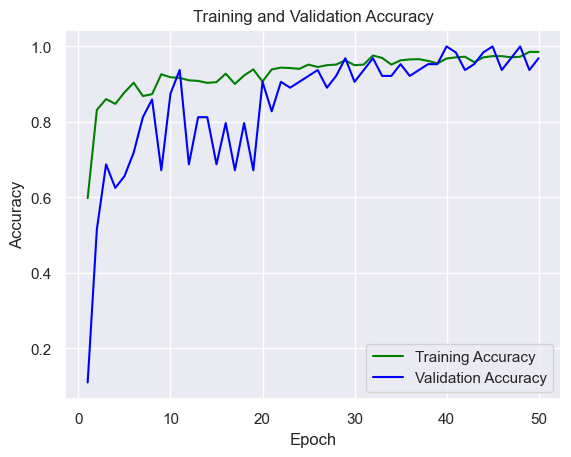

In [44]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

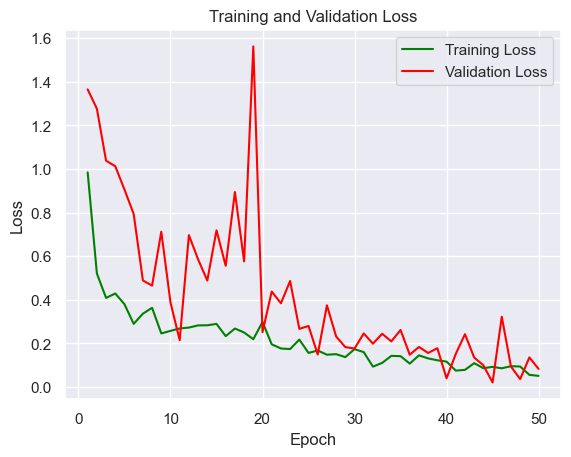

In [45]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

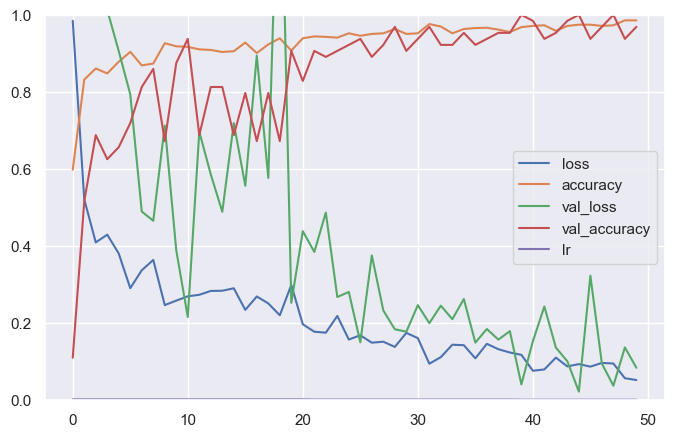

In [46]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1/1 [==============================] - 0s 19ms/step


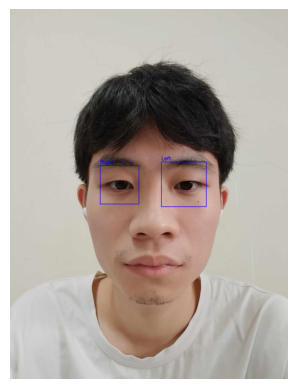

1/1 [==============================] - 0s 17ms/step


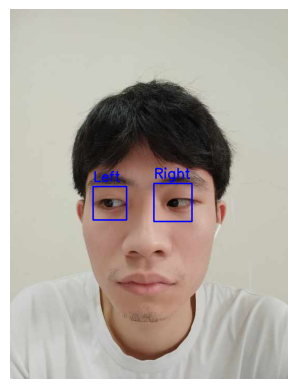

1/1 [==============================] - 0s 19ms/step


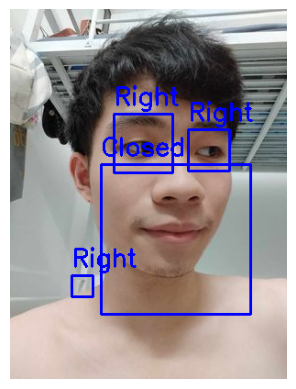

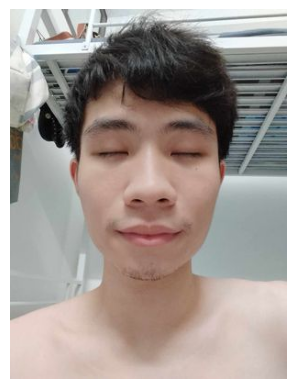

In [49]:
import matplotlib.pyplot as plt
from keras.models import load_model

# Load your trained model
model = load_model('model.hdf5')

# Function to detect eyes
def detect_eyes(image):
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray_image, 1.3, 5)
    return eyes

# Function to preprocess the eye region for prediction
def preprocess_eye(eye_region):
    eye_region = cv2.resize(eye_region, (94, 94))  # Resize to the input size of your model
    eye_region = eye_region.astype('float32') / 255.0
    eye_region = np.expand_dims(eye_region, axis=0)
    return eye_region

# Function to predict the state of the eye
def predict_eye_state(eye_region):
    processed_eye = preprocess_eye(eye_region)
    prediction = model.predict(processed_eye)
    return np.argmax(prediction, axis=1)[0]

# Function to process an input image and display using matplotlib
def process_image(image_path):
    image = cv2.imread(image_path)
    eyes = detect_eyes(image)
    
    labels = {0: 'Closed', 1: 'Forward', 2: 'Left', 3: 'Right'}
    
    for (x, y, w, h) in eyes:
        eye_region = image[y:y+h, x:x+w]
        state = predict_eye_state(eye_region)
        label = labels[state]
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Test the function with an example image
process_image(".\\test image\\test.jpg")
process_image(".\\test image\\left.jpg")

